In [6]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
price_trend = ctrl.Antecedent(np.arange(0, 11, 1), 'price_trend')  # Stock price trend
volume = ctrl.Antecedent(np.arange(0, 11, 1), 'volume')  # Volume of trade
sentiment = ctrl.Antecedent(np.arange(0, 11, 1), 'sentiment')  # Market sentiment
decision = ctrl.Consequent(np.arange(0, 101, 1), 'decision')  # Investment decision

# Define membership functions for price trend
price_trend['downtrend'] = fuzz.trimf(price_trend.universe, [0, 0, 5])
price_trend['stable'] = fuzz.trimf(price_trend.universe, [0, 5, 10])
price_trend['uptrend'] = fuzz.trimf(price_trend.universe, [5, 10, 10])

# Define membership functions for volume
volume['low'] = fuzz.trimf(volume.universe, [0, 0, 5])
volume['medium'] = fuzz.trimf(volume.universe, [0, 5, 10])
volume['high'] = fuzz.trimf(volume.universe, [5, 10, 10])

# Define membership functions for sentiment
sentiment['negative'] = fuzz.trimf(sentiment.universe, [0, 0, 5])
sentiment['neutral'] = fuzz.trimf(sentiment.universe, [0, 5, 10])
sentiment['positive'] = fuzz.trimf(sentiment.universe, [5, 10, 10])

# Define membership functions for decision
decision['sell'] = fuzz.trimf(decision.universe, [0, 0, 50])
decision['hold'] = fuzz.trimf(decision.universe, [0, 50, 100])
decision['buy'] = fuzz.trimf(decision.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(price_trend['uptrend'] & volume['high'] & sentiment['positive'], decision['buy'])
rule2 = ctrl.Rule(price_trend['downtrend'] & volume['high'] & sentiment['negative'], decision['sell'])
rule3 = ctrl.Rule(price_trend['stable'] | volume['medium'] | sentiment['neutral'], decision['hold'])

# Create control system
investment_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
investment_sim = ctrl.ControlSystemSimulation(investment_ctrl)

# Example input values
investment_sim.input['price_trend'] = 7  # Uptrend
investment_sim.input['volume'] = 8  # High
investment_sim.input['sentiment'] = 9  # Positive

# Compute result
investment_sim.compute()
print(f"Investment Decision: {investment_sim.output['decision']}")



Investment Decision: 53.76811594202898


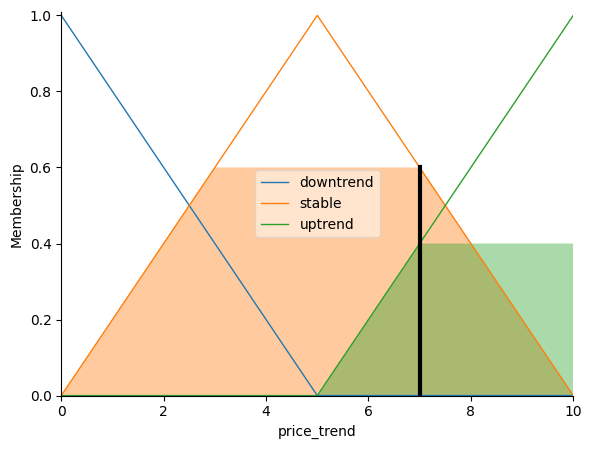

In [4]:
# Plotting the result
price_trend.view(sim=investment_sim)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=1.5)
plt.show()

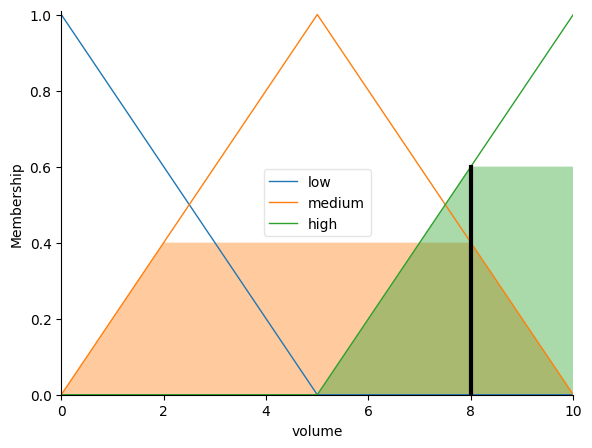

In [5]:
# Plotting the result
volume.view(sim=investment_sim)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=1.5)
plt.show()

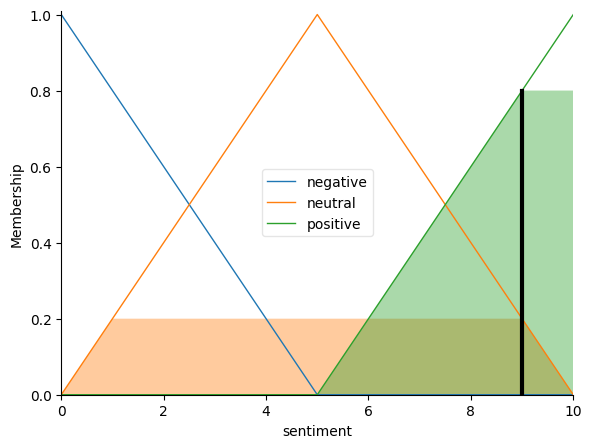

In [ ]:
# Plotting the result
sentiment.view(sim=investment_sim)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=1.5)
plt.show()

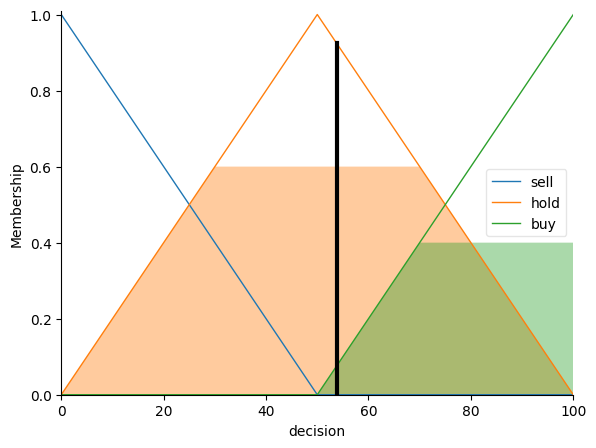

In [ ]:
# Plotting the result
decision.view(sim=investment_sim)
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=1.5)
plt.show()